In [23]:
# Import modules needed for the program
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from scipy.stats import pearsonr
import scipy
import scipy.stats
from scipy.stats import t
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#download second csv file
df_gini = pd.read_csv('/content/drive/MyDrive/inequality calculation/economic-inequality-gini-index.csv')
#download second csv file
df_gdp = pd.read_csv('/content/drive/MyDrive/inequality calculation/gdp-per-capita-maddison-2020.csv')

In [26]:
#merging files
df_gini_gdp=pd.merge(df_gini, df_gdp, how="outer", on=['Entity','Year'])

In [27]:
#dropna's
df_gini_gdp_drop =df_gini_gdp.drop([ 'Code_x', 'Code_y','417485-annotations', 'Year'], axis='columns')
df_gini_gdp_final = df_gini_gdp_drop.dropna()

In [28]:
df_gini_gdp_final.head(20)

,Entity,Gini coefficient,GDP per capita
0,Albania,0.270103,3965.685303
1,Albania,0.317390,5608.962402
2,Albania,0.305957,6858.466797
3,Albania,0.299847,8522.129883
4,Albania,0.289605,9592.000000
5,Albania,0.345989,9808.000000
6,Albania,0.327537,10032.000000
7,Albania,0.337363,10342.000000
8,Albania,0.330557,10702.120117
9,Albania,0.301483,11104.166016


In [29]:
# applying groupby() function to
# group the data on team value.
df_entity_coefficient=df_gini_gdp_final.groupby(['Entity']).mean()
df_entity_coefficient.head(20)

,Gini coefficient,GDP per capita
Entity,,
Albania,0.312583,8653.553052
Algeria,0.343802,7732.127930
Angola,0.486482,5509.608724
Armenia,0.329710,8387.596240
Australia,0.335072,38370.341797
Austria,0.299667,37760.052548
Azerbaijan,0.293987,5218.689575
Bangladesh,0.307950,1710.438156
Belarus,0.278296,13939.957838


In [30]:
#To convert our two fields to numpy arrays.
dfArr1 = np.array(df_entity_coefficient['Gini coefficient'])
dfArr2 = np.array(df_entity_coefficient['GDP per capita'])

In [31]:
#then we can use numpy's corrcoef function: 
#If it's good we get the same result
np.corrcoef(dfArr1, dfArr2)

array([[ 1.        , -0.45780678],
       [-0.45780678,  1.        ]])

In [32]:
#using pearsonr for correlation calculation
pearsonr(df_entity_coefficient['GDP per capita'], df_entity_coefficient['Gini coefficient'])

(-0.4578067797248221, 5.542822182651294e-09)

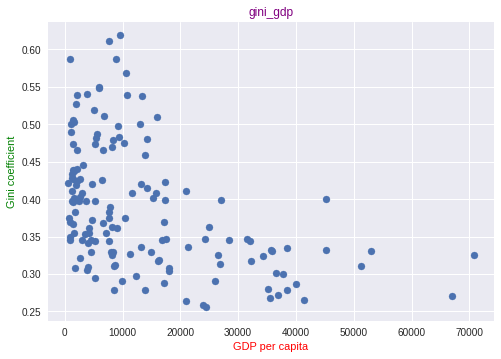

In [33]:
#create a scatterplot
plt.title("gini_gdp", color="purple")
plt.ylabel("Gini coefficient", color="green")
plt.xlabel("GDP per capita", color="red")
plt.scatter(y=df_entity_coefficient['Gini coefficient'], x=df_entity_coefficient['GDP per capita'])

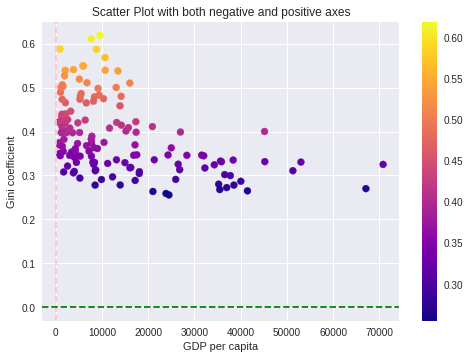

In [34]:
# creating two array for plotting
x = df_entity_coefficient['GDP per capita']
y = df_entity_coefficient['Gini coefficient']
  
# creating scatter plot with both negative 
# and positive axes
plt.scatter(x, y, c=y, cmap='plasma')
  
# adding vertical line in data co-ordinates
plt.axvline(0, c='pink', ls='--')
  
# adding horizontal line in data co-ordinates
plt.axhline(0, c='green', ls='--')
  
# giving X and Y label
plt.xlabel("GDP per capita")
plt.ylabel("Gini coefficient")
  
# giving title to the plot
plt.title("Scatter Plot with both negative and positive axes")
  
# visualizing the mapping from values to colors
plt.colorbar()
  
# visualizing the plot using plt.show() function
plt.show()

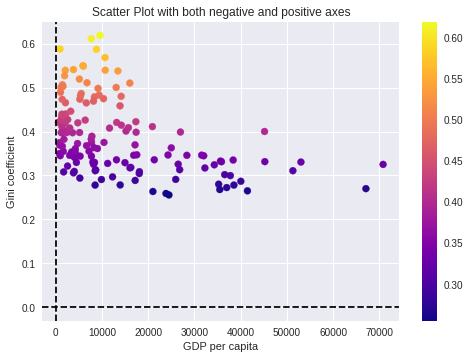

In [35]:
# creating two array for plotting
x = df_entity_coefficient['GDP per capita']
y = df_entity_coefficient['Gini coefficient']
# adding style theme in scatter plot
plt.style.use('seaborn')
  
# creating scatter plot with both negative 
# and positive axes
plt.scatter(x, y, c=y, cmap='plasma')
  
# adding vertical line in data co-ordinates
plt.axvline(0, c='black', ls='--')
  
# adding horizontal line in data co-ordinates
plt.axhline(0, c='black', ls='--')
  
# giving x label to the plot
plt.xlabel("GDP per capita")
  
# giving y label to the plot
plt.ylabel("Gini coefficient")
  
# giving title to the plot
plt.title("Scatter Plot with both negative and positive axes")
  
  
# visualizing the mapping from values to colors
plt.colorbar()
  
# visualizing the plot using plt.show() function
plt.show()

In [59]:
#a simple way to calculate the sum of the correlation coefficient
x = df_entity_coefficient['GDP per capita']
y = df_entity_coefficient['Gini coefficient']
def pearsonr(x, y):
  # Assume len(x) == len(y)
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(xi*xi for xi in x)
  sum_y_sq = sum(yi*yi for yi in y)
  psum = sum(xi*yi for xi, yi in zip(x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

In [63]:
#another example how to calculate correlation
import math
# calculates the mean
def mean(x):
    sum = 0.0
    for i in x:
         sum += i
    return sum / len(x) 
# calculates the sample standard deviation
def sampleStandardDeviation(x):
    sumv = 0.0
    for i in x:
         sumv += (i - mean(x))**2
    return math.sqrt(sumv/(len(x)-1))
# calculates the PCC using both the 2 functions above
def pearson(x,y):
    scorex = []
    scorey = []
    for i in x: 
        scorex.append((i - mean(x))/sampleStandardDeviation(x)) 
    for j in y:
        scorey.append((j - mean(y))/sampleStandardDeviation(y))
# multiplies both lists together into 1 list (hence zip) and sums the whole list   
    return (sum([i*j for i,j in zip(scorex,scorey)]))/(len(x)-1)

x,y.head(20).mean()

(Entity
 Albania                          8653.553052
 Algeria                          7732.127930
 Angola                           5509.608724
 Armenia                          8387.596240
 Australia                       38370.341797
 Austria                         37760.052548
 Azerbaijan                       5218.689575
 Bangladesh                       1710.438156
 Belarus                         13939.957838
 Belgium                         35230.154297
 Benin                            2007.697906
 Bolivia                          5114.556474
 Bosnia and Herzegovina           8189.906616
 Botswana                         8798.387695
 Brazil                          10667.562902
 Bulgaria                        13137.065796
 Burkina Faso                     1345.711263
 Burundi                           844.508133
 Cameroon                         2187.565063
 Canada                          35843.889974
 Cape Verde                       5220.960938
 Central African Republic 

In [65]:
#and so, if you use the pearsonr method again you see the result is the same as the previous correlation outcome
pearsonr(x,y)

-0.457806779724818

In [66]:
#We'll use the same values from the manual example from before. Let's store that into x_simple and compute the correlation matrix:

df_x_simple = np.array(df_entity_coefficient['GDP per capita'])
df_y_simple = np.array(df_entity_coefficient['Gini coefficient'])
my_coefficient = np.corrcoef(df_x_simple, df_y_simple)

print(my_coefficient)

[[ 1.         -0.45780678]
 [-0.45780678  1.        ]]


In [67]:
#Positive and Negative Correlation Examples
#Let's visualize the correlation coefficients for a few relationships. First, we'll have a complete positive (+1) and complete negative (-1) correlation between two variables. 
#Then, we'll generate two random variables, so the correlation coefficient should by all means be close to zero, unless the randomness accidentally has some correlation, which is highly unlikely.
#We'll use a seed so that this example is repeatable when calling the RandomState from Numpy:
seed = 13
rand = np.random.RandomState(seed)

x = rand.uniform(0,1,100)
x = np.vstack((x,x*2+1))
x = np.vstack((x,x[0,]*2+1))
x = np.vstack((x,rand.normal(1,3,100)))
print(x)

[[ 7.77702411e-01  2.37541220e-01  8.24278533e-01  9.65749198e-01
   9.72601114e-01  4.53449247e-01  6.09042463e-01  7.75526515e-01
   6.41613345e-01  7.22018230e-01  3.50365241e-02  2.98449471e-01
   5.85124919e-02  8.57060943e-01  3.72854028e-01  6.79847952e-01
   2.56279949e-01  3.47581215e-01  9.41277008e-03  3.58333783e-01
   9.49094182e-01  2.17899009e-01  3.19391366e-01  9.17772386e-01
   3.19036664e-02  6.50845370e-02  6.29828999e-01  8.73813443e-01
   8.71573230e-03  7.46577237e-01  8.12841171e-01  7.57174462e-02
   6.56455335e-01  5.09262200e-01  4.79883391e-01  9.55574145e-01
   1.20335695e-05  2.46978701e-01  7.12232678e-01  3.24582050e-01
   2.76996356e-01  6.95445453e-01  9.18551748e-01  2.44475702e-01
   4.58085817e-01  2.52992683e-01  3.79333291e-01  6.04538829e-01
   7.72378760e-01  6.79174968e-02  6.86085079e-01  5.48260097e-01
   1.37986053e-01  9.87532192e-02  2.45559105e-01  1.51786663e-01
   9.25994479e-01  6.80105016e-01  2.37658922e-01  5.68885253e-01
   5.56632

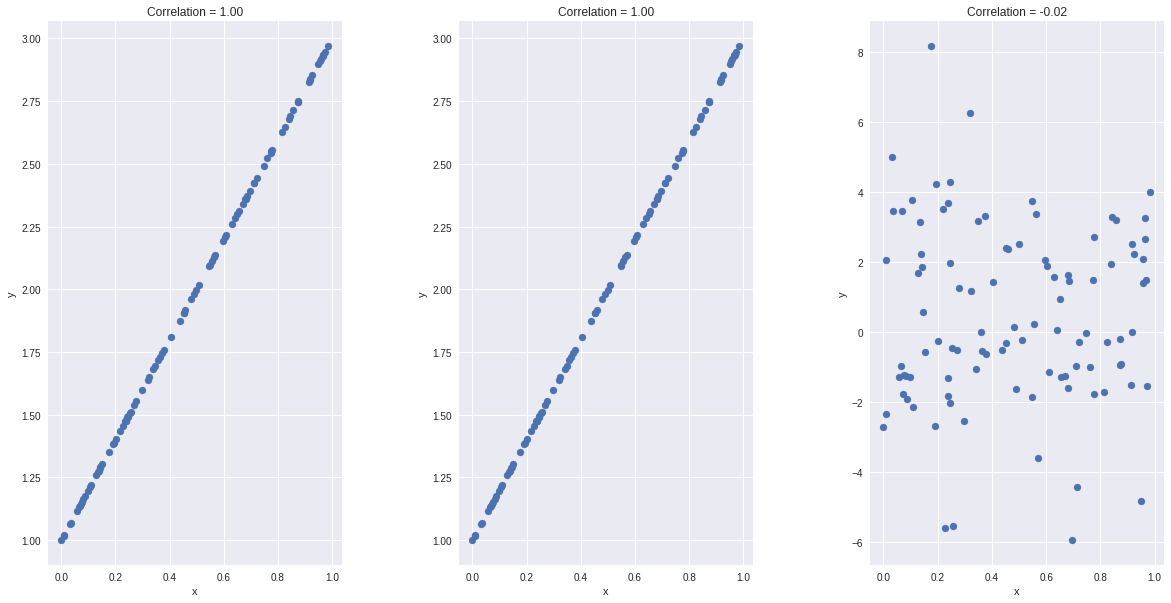

In [68]:
#Then, we can call vstack() to vertically stack other arrays to it. This way, we can stack a bunch of variables like the ones above in the same x reference and access them sequentially.
#After the first uniform distribution, we've stacked a few variable sets vertically - the second one has a complete positive relation to the first one, 
#the third one has a complete negative correlation to the first one, and the fourth one is fully random, so it should have a ~0 correlation.
#When we have a single x reference like this, we can calculate the correlation for each of the elements in the vertical stack by passing it alone to np.corrcoef():
rho = np.corrcoef(x)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
for i in [0,1,2]:
    ax[i].scatter(x[0,],x[1+i,])
    ax[i].title.set_text('Correlation = ' + "{:.2f}".format(rho[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()

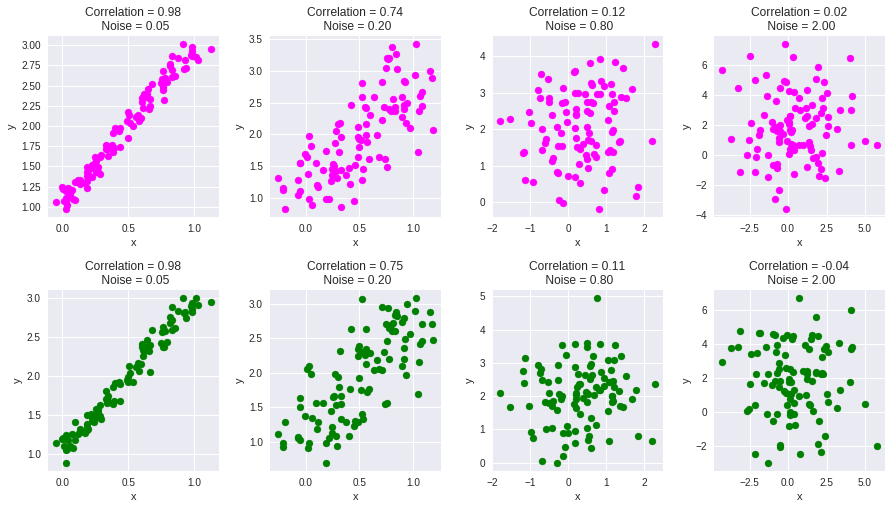

In [69]:
#Understanding Pearson's Correlation Coefficient Changes. Just to see how the correlation coefficient changes with a change in the relationship between the two variables, 
#let's add some random noise to the x matrix generated in the previous section and re-run the code.
#In this example, we'll slowly add varying degrees of noise to the correlation plots, and calculating the correlation coefficients on each step:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

for noise, i in zip([0.05,0.2,0.8,2],[0,1,2,3]):
    # Add noise
    x_with_noise = x+rand.normal(0,noise,x.shape)
    
    # Compute correlation
    rho_noise = np.corrcoef(x_with_noise)
    
    # Plot column wise. Positive correlation in row 0 and negative in row 1
    ax[0,i].scatter(x_with_noise[0,],x_with_noise[1,],color='magenta')
    ax[1,i].scatter(x_with_noise[0,],x_with_noise[2,],color='green')
    ax[0,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,1])
                        + '\n Noise = ' + "{:.2f}".format(noise) )
    ax[1,i].title.set_text('Correlation = ' + "{:.2f}".format(rho_noise[0,2])
                        + '\n Noise = ' + "{:.2f}".format(noise))
    ax[0,i].set(xlabel='x',ylabel='y')    
    ax[1,i].set(xlabel='x',ylabel='y')
    
fig.subplots_adjust(wspace=0.3,hspace=0.4)    
plt.show()

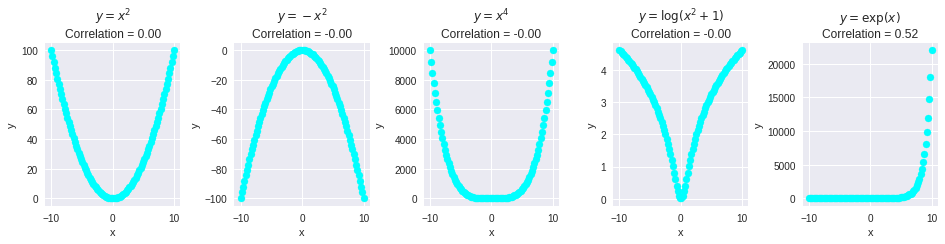

In [70]:
#A Common Pitfall: Associations with no Correlation
#There is a common misconception that zero correlation implies no association. Let's clarify that correlation strictly measures the linear relationship between two variables.
#The examples below show variables which are non-linearly associated with each other but have zero correlation.
#The last example of (y=ex) has a correlation coefficient of around 0.52, which is again not a reflection of the true association between the two variables:
# Create a data matrix
x_nonlinear = np.linspace(-10,10,100)
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear*x_nonlinear))
x_nonlinear = np.vstack((x_nonlinear,-x_nonlinear[0,]**2))
x_nonlinear = np.vstack((x_nonlinear,x_nonlinear[0,]**4))
x_nonlinear = np.vstack((x_nonlinear,np.log(x_nonlinear[0,]**2+1)))
x_nonlinear = np.vstack((x_nonlinear,np.exp(x_nonlinear[0,])))

# Compute the correlation
rho_nonlinear = np.corrcoef(x_nonlinear)

# Plot the data
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 3))
title = ['$y=x^2$','$y=-x^2$','$y=x^4$','$y=\log(x^2+1)$','$y=\exp(x)$']
for i in [0,1,2,3,4]:
    ax[i].scatter(x_nonlinear[0,],x_nonlinear[1+i,],color='cyan')
    ax[i].title.set_text(title[i] + '\n' + 
                         'Correlation = ' + "{:.2f}".format(rho_nonlinear[0,i+1]))
    ax[i].set(xlabel='x',ylabel='y')
fig.subplots_adjust(wspace=.4)    
plt.show()